# Inertia equation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from inertia_particle import euler_maruyama
from scipy.optimize import curve_fit

In [2]:
# Paramètres de la simulation
step = 10000 # Nombre de pas de temps
dt = 0.05 # Pas de temps
T = step*dt # Temps total de simulation
gamma = 1.0 # Coefficient de friction
D = 1.0 # Coefficient de diffusion
x0 = 0.0 # Position initiale
v0 = 0.0 # Vitesse initiale
# Simulation du mouvement brownien
T = step*dt # Temps total de simulation
x0 = np.zeros((10000,)) # Position initiale
x, v = euler_maruyama(D, gamma, T, dt, x0=x0)
t = np.arange(0, T, dt)

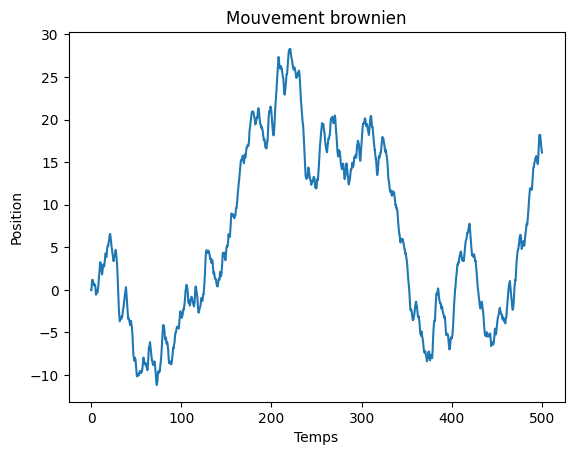

In [3]:
plt.plot(t, x[:, 2])
plt.xlabel('Temps')
plt.ylabel('Position')
plt.title('Mouvement brownien')
plt.show()

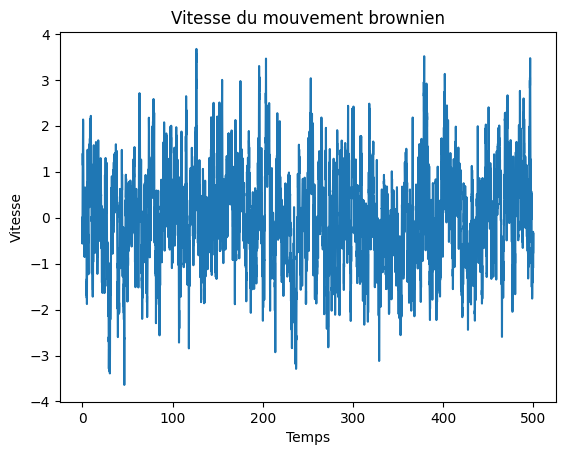

In [4]:
plt.plot(t, v[:, 2])
plt.xlabel('Temps')
plt.ylabel('Vitesse')
plt.title('Vitesse du mouvement brownien')
plt.show()

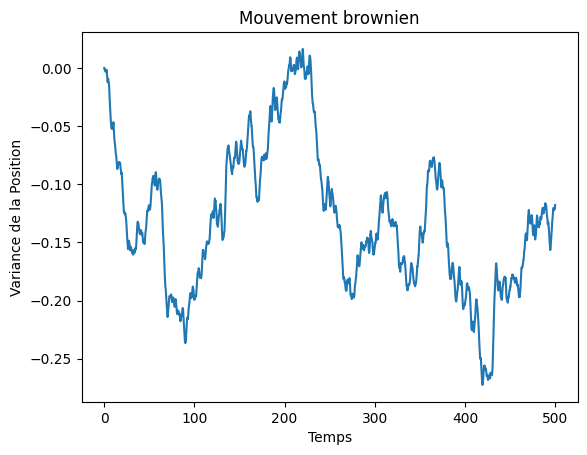

In [5]:
plt.plot(t, x.mean(axis=1))
plt.xlabel('Temps')
plt.ylabel('Variance de la Position')
plt.title('Mouvement brownien')
plt.show()